In [1]:
import numpy as np
from qiskit import QuantumCircuit

In [2]:
circ = QuantumCircuit(2)

In [3]:
circ.h(0)
circ.cx(0,1)

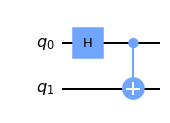

In [4]:
circ.draw('mpl')

In [5]:
from qiskit.quantum_info import Statevector

In [6]:
state = Statevector.from_int(0,2**2)
state = state.evolve(circ)
state.draw('latex')

<IPython.core.display.Latex object>

In [7]:
from qiskit.visualization import array_to_latex

In [8]:
array_to_latex(state)

<IPython.core.display.Latex object>

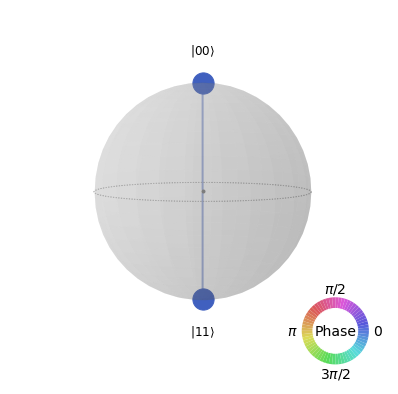

In [9]:
state.draw('qsphere')

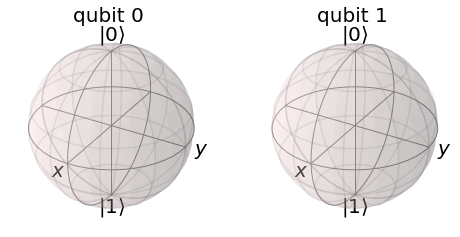

In [10]:
state.draw('bloch')

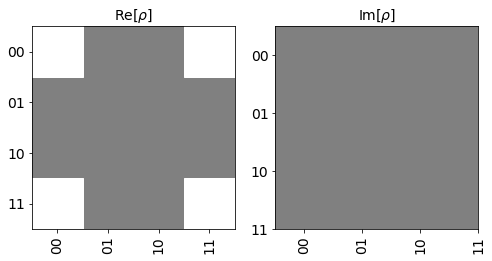

In [11]:
state.draw('hinton')

In [12]:
from qiskit.quantum_info import Operator

In [13]:
U = Operator(circ)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j]])

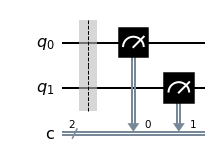

In [14]:
meas = QuantumCircuit(2,2)
meas.barrier(range(2))
meas.measure(range(2),range(2))
meas.draw('mpl')

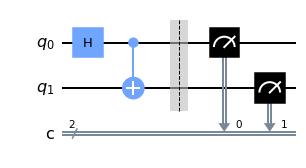

In [15]:
qc = meas.compose(circ,range(2),front=True)
qc.draw('mpl')

In [16]:
from qiskit import transpile # What is that?
from qiskit.providers.aer import QasmSimulator

In [17]:
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)

In [18]:
job_sim = backend.run(qc_compiled,shots=1024)
results_sim = job_sim.result()

In [19]:
counts = results_sim.get_counts(qc_compiled)
print(counts)

{'11': 499, '00': 525}


In [20]:
from qiskit.visualization import plot_histogram

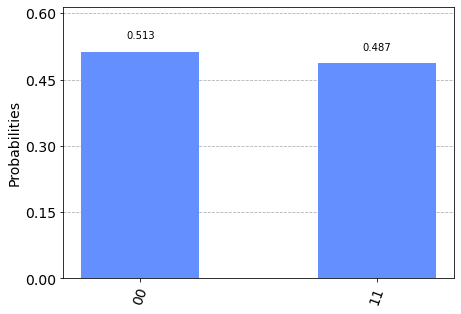

In [21]:
plot_histogram(counts)